In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn import datasets
from sklearn import metrics
from sklearn.datasets import make_blobs
import pandas as pd


# **K-mean Alhorithm**

# **Create Kmean Algorithm from Scratch**

In [2]:
class KMeansClustering:

# constructor initilizes variables
    def __init__(self, X , num_clusters): # contains object
        self.K = num_clusters # set the number of cluster k to provided value
        self.max_iterations = 100 # max itertaion for the k means algorthim converage
        self.plot_figure = True # plot cluster by diffult
        self.num_examples = X.shape[0] # set the number of the examples in the dataset to the row
        self.num_features = X.shape[1] # set the number of the features to the column



    def initialize_random_centroids(self, X):
        centroids = np.zeros((self.K, self.num_features)) # creates a numpy array that will sort the centroid coordinates

        for k in range(self.K): # itirate over the num of clusters
            centroid = X[np.random.choice(range(self.num_examples))] # initilize the centroid from randomly selecting a datapoint in the dataset
            centroids[k] = centroid # put the centroids inside the centroid array

        return centroids # return array of the initilize centroids for each cluster



# compute each datapoint to every cluster and find the minimum distance from the cluster
    def create_clusters(self, X, centroids):
        # Will contain a list of the points that are associated with that specific cluster
        clusters = [[] for _ in range(self.K)] # initilize an empty list for each cluster, each list contains a list of the indices of the datapoint that belongs to that cluster

        # Loop through each point and check which is the closest cluster
        for point_idx, point in enumerate(X): # calculate distance of the points from the centroid
            closest_centroid = np.argmin( # np.argmin gives the minimum value in the area finding the centroid
                np.sqrt(np.sum((point - centroids) ** 2, axis=1)) # euclidean distance calculate everypoint and each centroid
            )
            clusters[closest_centroid].append(point_idx) # assign each datapoint to the list of closest centroid

            # the clusters are built where each cluster is a list of indices of datapoints assigned to that cluster
        return clusters # return the list of the list clusters where each inner list contains the indexs of the datapoints that belong to that cluster



    # find the centroid of each cluster by computing the average of datapoints within every cluster
    def calculate_new_centroids(self, clusters, X):
        centroids = np.zeros((self.K, self.num_features)) # create an array of zeros corresponding the number of clusters
        for idx, cluster in enumerate(clusters): # for each current cluster
            new_centroid = np.mean(X[cluster], axis=0) # compute the mean of the datapoints in the clusters in the columns
            centroids[idx] = new_centroid # update the centroids for each cluster

        return centroids # return an array of the updated centroids



# reassign each datapoint to the labeled cluster to which they belong
    def reassign_cluster(self, clusters, X):
        y_pred = np.zeros(self.num_examples) # initilize an array with zeros for datapoint for initializeing the cluster

        for cluster_idx, cluster in enumerate(clusters): # for each cluster index in cluster i, iterate over every cluster
            for sample_idx in cluster: # for each datapoint in the cluster i
                y_pred[sample_idx] = cluster_idx # assign each datapoint to the predicted cluster i

        return y_pred # return an array an array containing the predicted cluster label for each datapoint



# itterativly improve the assignment of the clusters and their centroids
    def fit(self, X):
        centroids = self.initialize_random_centroids(X) # initilize the centroid by the calling function

        for i in range(self.max_iterations): # update centroid and ressign until reaching max_iteration
            clusters = self.create_clusters(X, centroids) # assign each datapoint to the closest centroid

            previous_centroids = centroids # store the current centroid as the previous centroid
            centroids = self.calculate_new_centroids(clusters, X) # calculate the new centroid based on the new centroid

            diff = centroids - previous_centroids # calculate the diff between the new and previous centroid

            if not diff.any(): # if there is no diff then terminate
                print("Termination criterion satisfied")
                break

        # Get label predictions
        y_pred = self.reassign_cluster(clusters, X)

        return y_pred, centroids # return the pedicted label for each datapoint

# **Plotting the dataset without label, with label, and with centroids**

In [3]:
def plot_clusters(X, y_pred, centroids):

    plt.figure(figsize=(18, 6))

    # Plot dataset without labels
    plt.subplot(1, 3, 1)
    plt.scatter(X[:, 0], X[:, 1], c='cornflowerblue')
    plt.title('Clustering Dataset (no labels)')
    plt.xlabel('X')
    plt.ylabel('Y')

    # Plot dataset with predicted labels
    plt.subplot(1, 3, 2)
    plt.scatter(X[:, 0], X[:, 1], c=y_pred, cmap='plasma')
    plt.title('Clustering Dataset (with predicted labels)')
    plt.xlabel('X')
    plt.ylabel('Y')

    # Plot k-means clustering with centroids in red
    plt.subplot(1, 3, 3)
    plt.scatter(X[:, 0], X[:, 1], c=y_pred, cmap='plasma')
    plt.scatter(centroids[:, 0], centroids[:, 1], c='black', marker='*', edgecolor='darkred', linewidth=3, s=100, label='Kmeans.Centroid')
    plt.legend()
    plt.title('K-means Clustering (with k = 3)')
    plt.xlabel('X')
    plt.ylabel('Y')

    plt.tight_layout()
    plt.show()

# **Apply Kmean from Scratch on DataSet1**

Termination criterion satisfied


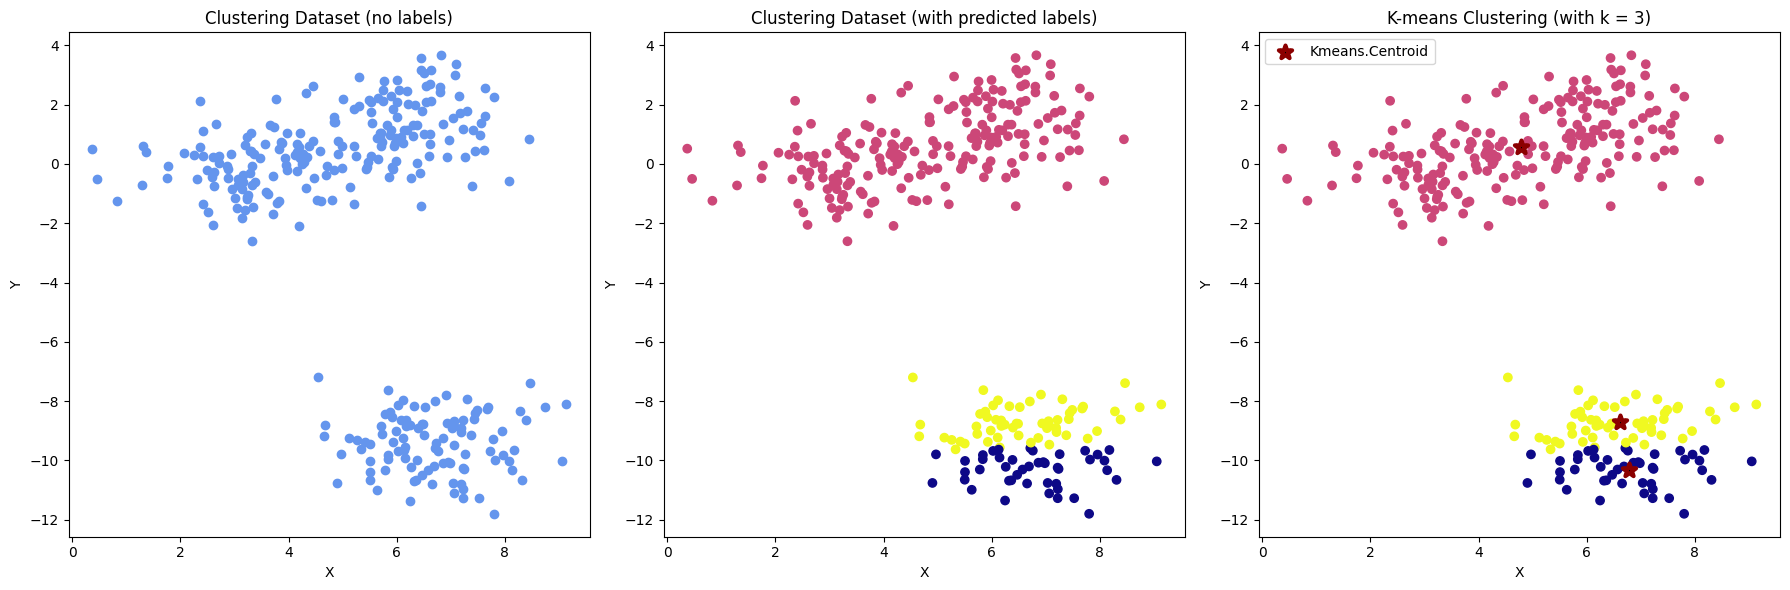

In [4]:
# Dataset1: blobs dataset
n_samples = 300
random_state = 99
num_clusters = 3

X, y1 = datasets.make_blobs(n_samples=n_samples, random_state=random_state)

kmeans = KMeansClustering(X, num_clusters)
y_pred1, centroids = kmeans.fit(X)

plot_clusters(X, y_pred1, centroids)

# **Calculate evaluation metrics**

In [5]:
import pandas as pd
from sklearn import metrics

# Calculate evaluation metrics
f_measure_1k = metrics.f1_score(y1, y_pred1, average='weighted')
nmi_1k = metrics.normalized_mutual_info_score(y1, y_pred1)
rand_1k = metrics.rand_score(y1, y_pred1)

# Create a styled table
results_styled = (
    pd.DataFrame({
        'Metric': ['F-measure', 'NMI', 'Rand Index'],
        'Score': [f_measure_1k, nmi_1k, rand_1k]
    })
    .sort_values(by='Score', ascending=False)
    .set_index('Metric')
    .assign(Score=lambda x: x['Score'].apply(lambda y: f'{y:.4f}'))
    .style.set_caption('Evaluation Metrics DataSet 1')
    .set_table_styles([
        {'selector': 'table', 'props': [('margin-left', '20px'), ('width', '900px'),
                                        ('background-color', '#f2f2f2'), ('border', '1px solid #ddd')]},
        {'selector': 'thead', 'props': [('display', 'none')]},
        {'selector': 'th.col_heading', 'props': [('display', 'none')]},
        {'selector': 'td', 'props': [('font-size', '14px'), ('text-align', 'left'),
                                      ('font-family', 'Arial, sans-serif'), ('padding', '13px')]}
    ])
)

# Display the table
results_styled


,Score
Metric,
Rand Index,0.7221
NMI,0.6483
F-measure,0.0000


# **Apply Kmean from Scratch on Dataset2**

Termination criterion satisfied


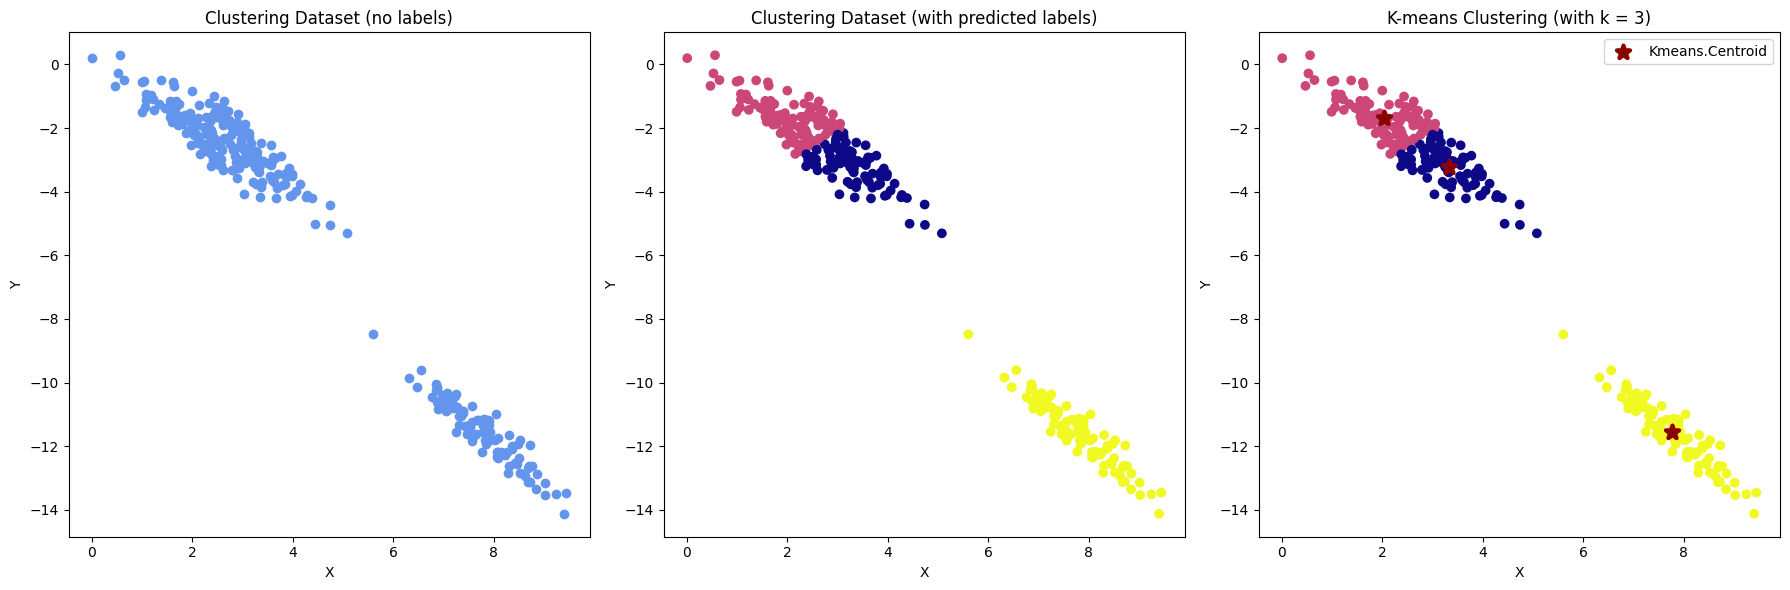

In [6]:
# Dataset2: Anisotropicly distributed dataset
n_samples = 300
random_state = 99
num_clusters = 3

X, y2 = datasets.make_blobs(n_samples=n_samples,random_state=random_state)
transformation = [[0.6, -0.6], [-0.4, 0.8]]
X = np.dot(X, transformation)

Kmeans = KMeansClustering(X, num_clusters)
y_pred2, centroids = Kmeans.fit(X)

plot_clusters(X, y_pred2, centroids)

# **Calculate evaluation metrics**

In [7]:
import pandas as pd
from sklearn import metrics

# Calculate evaluation metrics
f_measure_2k = metrics.f1_score(y2, y_pred2, average='weighted')
nmi_2k = metrics.normalized_mutual_info_score(y2, y_pred2)
rand_2k = metrics.rand_score(y2, y_pred2)

# Create a styled table
results_styled = (
    pd.DataFrame({
        'Metric': ['F-measure', 'NMI', 'Rand Index'],
        'Score': [f_measure_2k, nmi_2k, rand_2k]
    })
    .sort_values(by='Score', ascending=False)
    .set_index('Metric')
    .assign(Score=lambda x: x['Score'].apply(lambda y: f'{y:.4f}'))
    .style.set_caption('Evaluation Metrics DataSet 2')
    .set_table_styles([
        {'selector': 'table', 'props': [('margin-left', '20px'), ('width', '900px'),
                                        ('background-color', '#f2f2f2'), ('border', '1px solid #ddd')]},
        {'selector': 'thead', 'props': [('display', 'none')]},
        {'selector': 'th.col_heading', 'props': [('display', 'none')]},
        {'selector': 'td', 'props': [('font-size', '14px'), ('text-align', 'left'),
                                      ('font-family', 'Arial, sans-serif'), ('padding', '13px')]}
    ])
)

results_styled


,Score
Metric,
Rand Index,0.8043
NMI,0.6180
F-measure,0.1002


# **Apply Kmean from Scratch on DataSet3**

Termination criterion satisfied


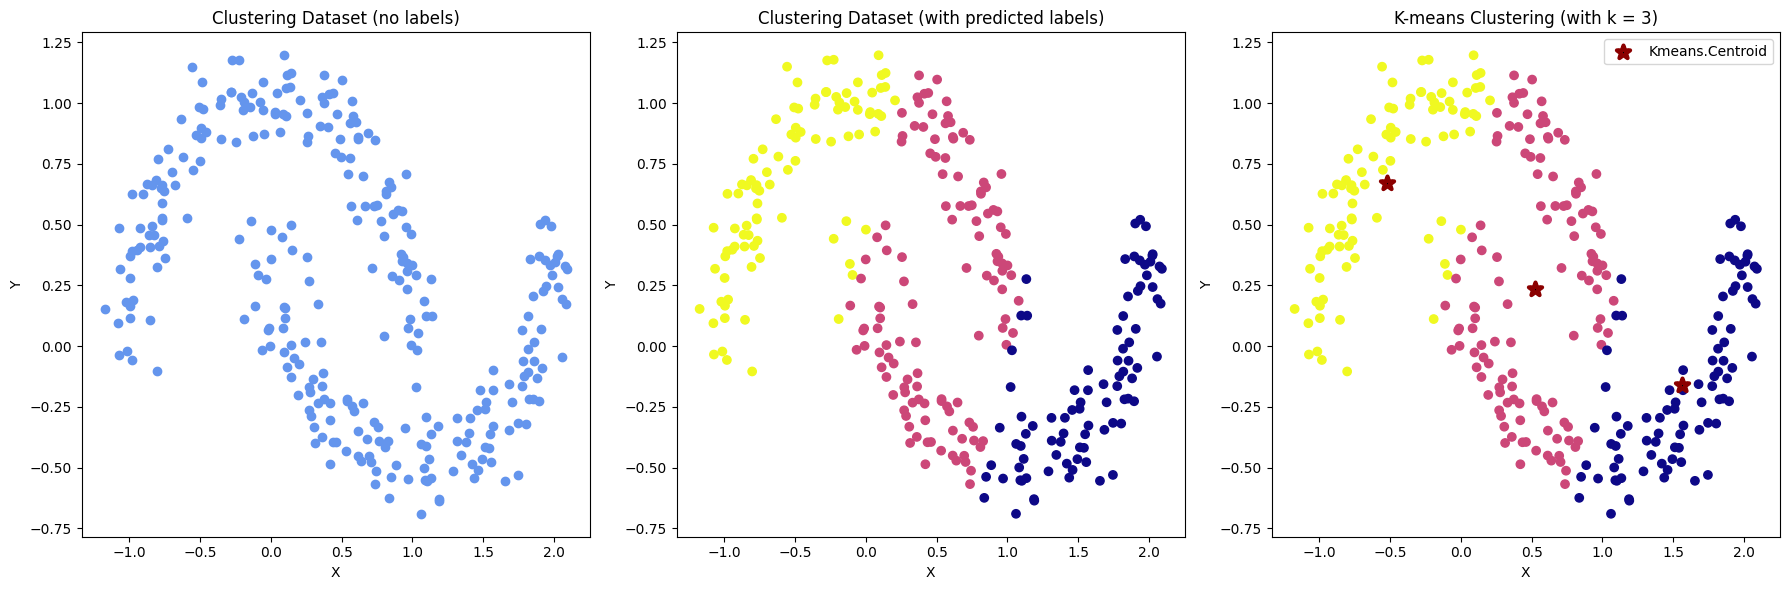

In [8]:
# Dataset3: noisy moons dataset
X, y3= datasets.make_moons(n_samples=n_samples, noise=0.1,random_state=random_state)

Kmeans = KMeansClustering(X, num_clusters)
y_pred3, centroids = Kmeans.fit(X)
plot_clusters(X, y_pred3, centroids)

# **Calculate evaluation metrics**

In [9]:
import pandas as pd
from sklearn import metrics

# Calculate evaluation metrics
f_measure_3k = metrics.f1_score(y3, y_pred3, average='weighted')
nmi_3k = metrics.normalized_mutual_info_score(y3, y_pred3)
rand_3k = metrics.rand_score(y3, y_pred3)

# Create a styled table
results_styled = (
    pd.DataFrame({
        'Metric': ['F-measure', 'NMI', 'Rand Index'],
        'Score': [f_measure_3k, nmi_3k, rand_3k]
    })
    .sort_values(by='Score', ascending=False)
    .set_index('Metric')
    .assign(Score=lambda x: x['Score'].apply(lambda y: f'{y:.4f}'))
    .style.set_caption('Evaluation Metrics DataSet 3')
    .set_table_styles([
        {'selector': 'table', 'props': [('margin-left', '20px'), ('width', '900px'),
                                        ('background-color', '#f2f2f2'), ('border', '1px solid #ddd')]},
        {'selector': 'thead', 'props': [('display', 'none')]},
        {'selector': 'th.col_heading', 'props': [('display', 'none')]},
        {'selector': 'td', 'props': [('font-size', '14px'), ('text-align', 'left'),
                                      ('font-family', 'Arial, sans-serif'), ('padding', '13px')]}
    ])
)

# Display the table
results_styled



,Score
Metric,
Rand Index,0.6340
NMI,0.3077
F-measure,0.2490


# **Apply Kmean from Scratch on DataSet4**

Termination criterion satisfied


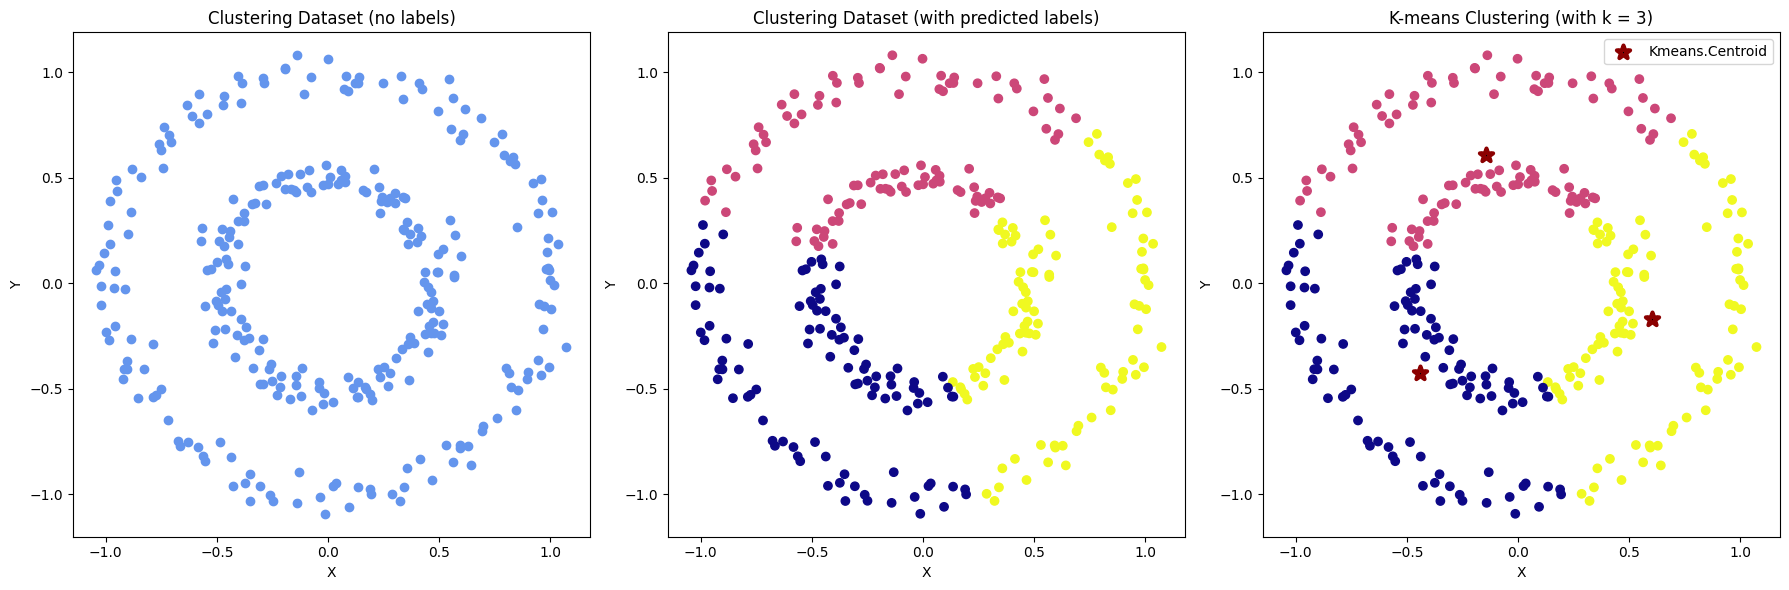

In [10]:
# Dataset4: noisy circles dataset
X,y4 = datasets.make_circles(n_samples=n_samples, factor=.5, noise=.05, random_state=random_state)

Kmeans = KMeansClustering(X, num_clusters)
y_pred4, centroids = Kmeans.fit(X)

plot_clusters(X, y_pred4, centroids)

In [11]:
import pandas as pd
from sklearn import metrics

# Calculate evaluation metrics
f_measure_k4 = metrics.f1_score(y4, y_pred4, average='weighted')
nmi_k4 = metrics.normalized_mutual_info_score(y4, y_pred4)
rand_k4 = metrics.rand_score(y4, y_pred4)

# Create a styled table
results_styled = (
    pd.DataFrame({
        'Metric': ['F-measure', 'NMI', 'Rand Index'],
        'Score': [f_measure_k4, nmi_k4, rand_k4]
    })
    .sort_values(by='Score', ascending=False)
    .set_index('Metric')
    .assign(Score=lambda x: x['Score'].apply(lambda y: f'{y:.4f}'))
    .style.set_caption('Evaluation Metrics DataSet 4')
    .set_table_styles([
        {'selector': 'table', 'props': [('margin-left', '20px'), ('width', '900px'),
                                        ('background-color', '#f2f2f2'), ('border', '1px solid #ddd')]},
        {'selector': 'thead', 'props': [('display', 'none')]},
        {'selector': 'th.col_heading', 'props': [('display', 'none')]},
        {'selector': 'td', 'props': [('font-size', '14px'), ('text-align', 'left'),
                                      ('font-family', 'Arial, sans-serif'), ('padding', '13px')]}
    ])
)

# Display the\ table
results_styled


,Score
Metric,
Rand Index,0.4984
F-measure,0.4040
NMI,0.0000


# **DBSCAN ALgorithm**

# **Calclating the EPSILON and MINPOINT value**

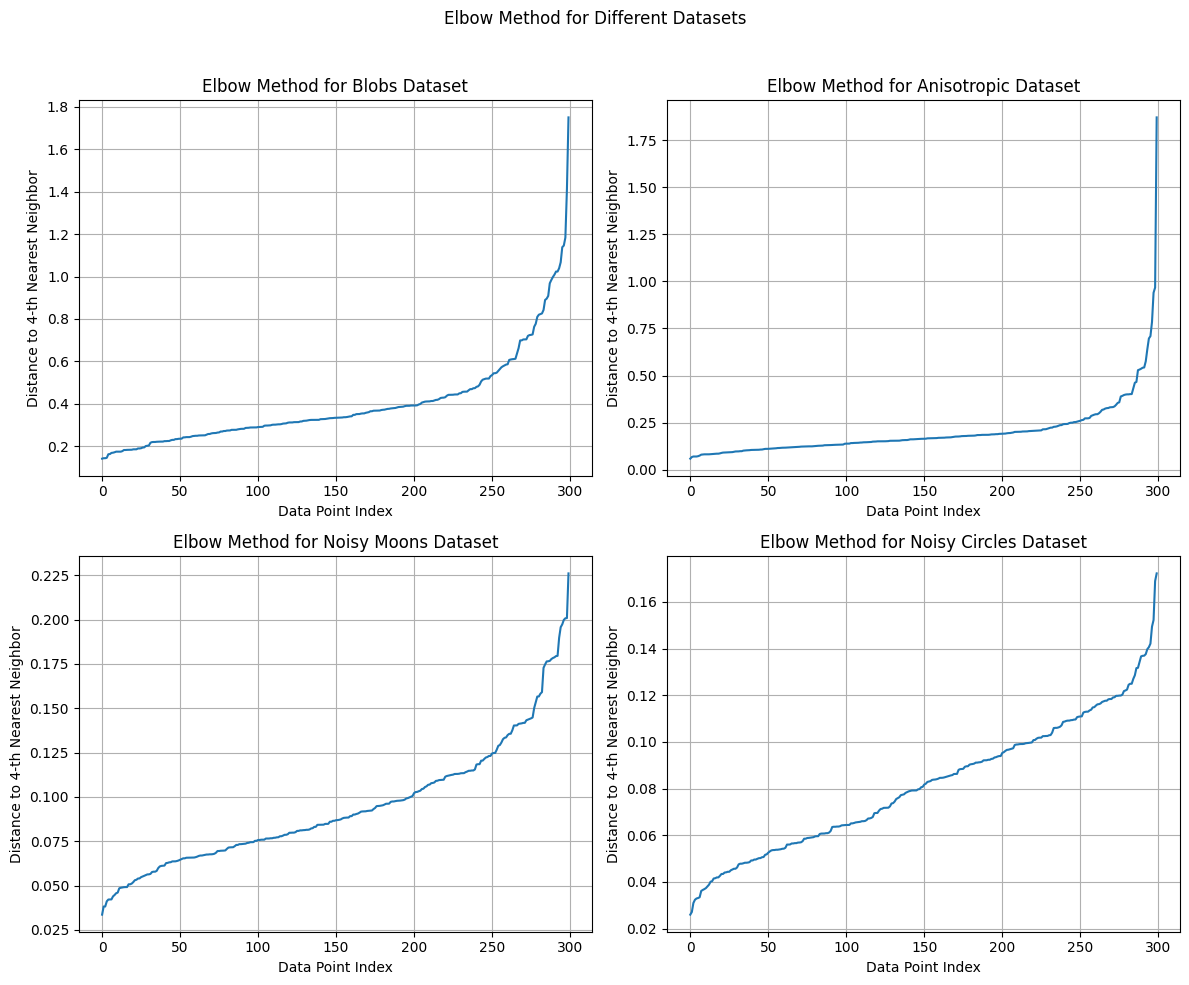

Blobs Dataset Shape: (300, 2)
Anisotropic Dataset Shape: (300, 2)
Noisy Moons Dataset Shape: (300, 2)
Noisy Circles Dataset Shape: (300, 2)


In [13]:
from sklearn.neighbors import NearestNeighbors
# Function to calculate the distance of the 4th neighbor and plot the elbow method
def plot_elbow(X, min_pts, dataset_name, ax):
    # Calculate the 4th nearest neighbor distances
    neigh = NearestNeighbors(n_neighbors=min_pts)
    neigh.fit(X)
    distances, _ = neigh.kneighbors(X)

    # Extract distances of the 4th neighbor
    fourth_neighbor_distances = distances[:, -1]

    # Sort the distances
    sorted_distances = np.sort(fourth_neighbor_distances)

    # Plot the sorted distances
    ax.plot(sorted_distances, label=dataset_name)
    ax.set_title(f'Elbow Method for {dataset_name} Dataset')
    ax.set_xlabel('Data Point Index')
    ax.set_ylabel(f'Distance to {min_pts}-th Nearest Neighbor')
    
    # Take the minimum value as the epsilon at the beginning of the increase
    epsilon_at_start_of_increase = np.min(sorted_distances)

    return epsilon_at_start_of_increase

# Set common parameters
n_samples = 300
random_state = 99

# Generate datasets

# Dataset1: Blobs dataset
X_blob, y_blob = datasets.make_blobs(n_samples=n_samples, random_state=random_state)

# Dataset2: Anisotropically distributed dataset
X_aniso, _ = datasets.make_blobs(n_samples=n_samples, random_state=random_state)
transformation = [[0.6, -0.6], [-0.4, 0.8]]
X_aniso = np.dot(X_aniso, transformation)

# Dataset3: Noisy moons dataset
X_moons, y_moons = datasets.make_moons(n_samples=n_samples, noise=0.1, random_state=random_state)

# Dataset4: Noisy circles dataset
X_circles, y_circles = datasets.make_circles(n_samples=n_samples, factor=.5, noise=.05, random_state=random_state)
# Create a 2x2 grid of subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
fig.suptitle('Elbow Method for Different Datasets')

# Apply the function for each dataset
epsilon_blob = plot_elbow(X_blob, min_pts=4, dataset_name='Blobs', ax=axes[0, 0])
epsilon_aniso = plot_elbow(X_aniso, min_pts=4, dataset_name='Anisotropic', ax=axes[0, 1])
epsilon_moons = plot_elbow(X_moons, min_pts=4, dataset_name='Noisy Moons', ax=axes[1, 0])
epsilon_circles = plot_elbow(X_circles, min_pts=4, dataset_name='Noisy Circles', ax=axes[1, 1])

# Add grid
for ax in axes.flatten():
    ax.grid(True)
# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.96])

# Show the plot
plt.show()

print("Blobs Dataset Shape:", X_blob.shape)
print("Anisotropic Dataset Shape:", X_aniso.shape)
print("Noisy Moons Dataset Shape:", X_moons.shape)
print("Noisy Circles Dataset Shape:", X_circles.shape)


# **DBSCAN from scratch¶**

In [14]:
class DBSCAN:
    def __init__(self, eps, minpoint):
        # Constructor to initialize DBSCAN with epsilon (eps) and minimum points (minpoint)
        self.eps = eps
        self.minpoint = minpoint

    @staticmethod
    def distance(point1, point2):
        # Static method to calculate the Euclidean distance between two points
        return np.linalg.norm(np.array(point1) - np.array(point2))

    def get_neighbors(self, point_index):
        # Method to get neighbors of a data point based on the distance threshold (epsilon)
        neighbors = []
        # Iterate over all data points to find neighbors within epsilon distance
        for i in range(len(self.data)):
            if self.distance(self.data[point_index], self.data[i]) <= self.eps:
                neighbors.append(i)
        return neighbors

    def fit(self, data):
        # Fit method to perform DBSCAN clustering on the given data
        self.data = data
        self.labels = [0] * len(data)  # Initialize cluster labels for each data point
        self.cluster_id = 0  # Initialize cluster ID

        # Iterate over each data point
        for i in range(len(data)):
            if self.labels[i] != 0:
                continue

            neighbors = self.get_neighbors(i)  # Get neighbors of the current data point

            # Check if the number of neighbors is greater than or equal to minpoint
            if len(neighbors) >= self.minpoint:
                self.cluster_id += 1  # Start a new cluster
                self.expand_cluster(i, neighbors)  # Expand the cluster with the current data point as the seed
            else:
                self.labels[i] = -1  # Mark the data point as noise (not part of any cluster)

    def expand_cluster(self, seed, neighbors):
        # Method to expand a cluster starting from a seed data point
        self.labels[seed] = self.cluster_id  # Assign the cluster ID to the seed data point

        i = 0
        # Iterate over the neighbors of the seed data point
        while i < len(neighbors):
            current_point = neighbors[i]

            # Assign the cluster ID to noise points that are part of the current cluster
            if self.labels[current_point] == -1:
                self.labels[current_point] = self.cluster_id

            # Expand the cluster to the current neighbor if it's not assigned to any cluster
            elif self.labels[current_point] == 0:
                self.labels[current_point] = self.cluster_id
                current_point_neighbors = self.get_neighbors(current_point)

                # If the current neighbor has enough neighbors, add them to the list of neighbors
                if len(current_point_neighbors) >= self.minpoint:
                    neighbors += current_point_neighbors

            i += 1

# **Dataset1: blobs dataset**

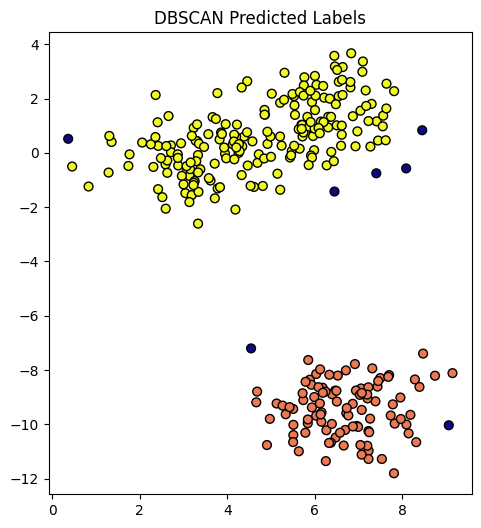

In [15]:
#Dataset 1 
n_samples = 300
random_state = 99
X, y = datasets.make_blobs(n_samples=n_samples, random_state=random_state)

# Initialize and fit the DBSCAN model
eps = 0.9
min_points = 4
dbscan_model = DBSCAN(eps=eps, minpoint=min_points)
dbscan_model.fit(X)

# Get the predicted labels from DBSCAN
predicted_labels = dbscan_model.labels

# Visualize the results
plt.figure(figsize=(12, 6))

# Plot DBSCAN predicted labels
plt.subplot(1, 2, 2)
plt.scatter(X[:, 0], X[:, 1], c=predicted_labels, cmap='plasma', edgecolors='k', s=40)
plt.title("DBSCAN Predicted Labels")

plt.show()

# **evaluation metrics for Dataset 1**

In [16]:
# Calculate evaluation metrics
f1_DB1 = metrics.f1_score(y, predicted_labels, average='weighted')
nmi_DB1 = metrics.normalized_mutual_info_score(y, predicted_labels)
rand_index_DB1 = metrics.rand_score(y, predicted_labels)  

# Create a styled table
results_styled = (
    pd.DataFrame({
        'Metric': ['F-measure', 'NMI', 'Rand Index'],
        'Score': [f1_DB1, nmi_DB1, rand_index_DB1]
    })
    .sort_values(by='Score', ascending=False)
    .set_index('Metric')
    .assign(Score=lambda x: x['Score'].apply(lambda y: f'{y:.4f}')) 
    .style.set_caption('Evaluation Metrics DataSet 1')
    .set_table_styles([
        {'selector': 'table', 'props': [('margin-left', '20px'), ('width', '900px'), 
                                        ('background-color', '#f2f2f2'), ('border', '1px solid #ddd')]}, 
        {'selector': 'thead', 'props': [('display', 'none')]},
        {'selector': 'th.col_heading', 'props': [('display', 'none')]},  
        {'selector': 'td', 'props': [('font-size', '14px'), ('text-align', 'left'), 
                                      ('font-family', 'Arial, sans-serif'), ('padding', '13px')]}  
    ])
)

# Display the table
results_styled

,Score
Metric,
Rand Index,0.7726
NMI,0.6833
F-measure,0.5469


# **Dataset2: Anisotropicly distributed dataset¶**

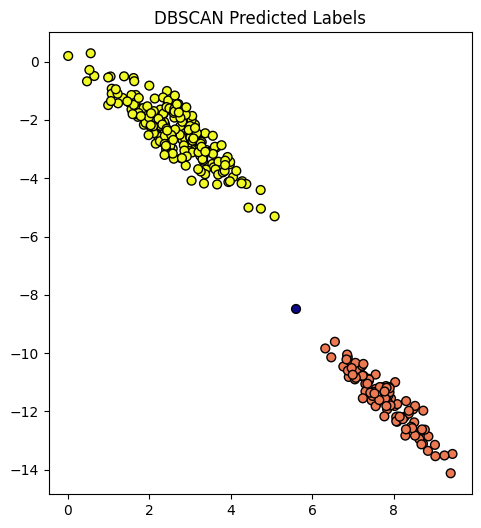

In [17]:
#Dataset 2 
n_samples = 300
random_state = 99

X, y2 = datasets.make_blobs(n_samples=n_samples,random_state=random_state)
transformation = [[0.6, -0.6], [-0.4, 0.8]]
X = np.dot(X, transformation)

# Initialize and fit the DBSCAN model
eps = 0.9
min_points = 4
dbscan_model = DBSCAN(eps=eps, minpoint=min_points)
dbscan_model.fit(X)

# Get the predicted labels from DBSCAN
predicted_labels2 = dbscan_model.labels

# Visualize the results
plt.figure(figsize=(12, 6))

# Plot DBSCAN predicted labels
plt.subplot(1, 2, 2)
plt.scatter(X[:, 0], X[:, 1], c=predicted_labels2, cmap='plasma', edgecolors='k', s=40)
plt.title("DBSCAN Predicted Labels")

plt.show()

# **evaluation metrics for Dataset 2**

In [18]:
# Calculate evaluation metrics
f1_DB2 = metrics.f1_score(y2, predicted_labels2, average='weighted')
nmi_DB2 = metrics.normalized_mutual_info_score(y2, predicted_labels2)
rand_index_DB2 = metrics.rand_score(y2, predicted_labels2)  

# Create a styled table
results_styled = (
    pd.DataFrame({
        'Metric': ['F-measure', 'NMI', 'Rand Index'],
        'Score': [f1_DB2, nmi_DB2, rand_index_DB2]
    })
    .sort_values(by='Score', ascending=False)
    .set_index('Metric')
    .assign(Score=lambda x: x['Score'].apply(lambda y: f'{y:.4f}')) 
    .style.set_caption('Evaluation Metrics DataSet 2')
    .set_table_styles([
        {'selector': 'table', 'props': [('margin-left', '20px'), ('width', '900px'), 
                                        ('background-color', '#f2f2f2'), ('border', '1px solid #ddd')]}, 
        {'selector': 'thead', 'props': [('display', 'none')]},
        {'selector': 'th.col_heading', 'props': [('display', 'none')]},  
        {'selector': 'td', 'props': [('font-size', '14px'), ('text-align', 'left'), 
                                      ('font-family', 'Arial, sans-serif'), ('padding', '13px')]}  
    ])
)

# Display the table
results_styled

,Score
Metric,
Rand Index,0.7748
NMI,0.7259
F-measure,0.5539


# **Dataset3: noisy moons dataset**

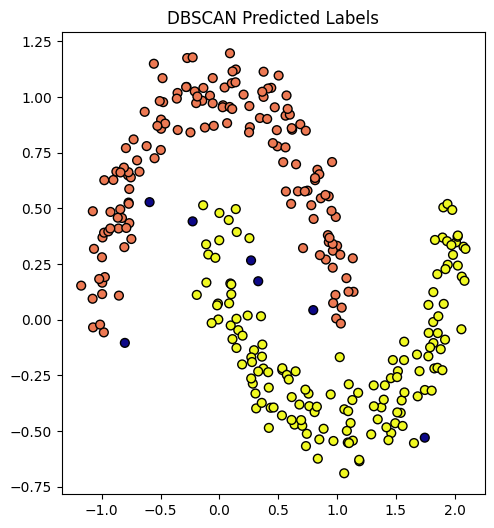

In [19]:
#Dataset 3
n_samples = 300
random_state = 99

X, y3= datasets.make_moons(n_samples=n_samples, noise=0.1,random_state=random_state)

# Initialize and fit the DBSCAN model
eps = 0.149
min_points = 4
dbscan_model = DBSCAN(eps=eps, minpoint=min_points)
dbscan_model.fit(X)

# Get the predicted labels from DBSCAN
predicted_labels3 = dbscan_model.labels

# Visualize the results
plt.figure(figsize=(12, 6))

# Plot DBSCAN predicted labels
plt.subplot(1, 2, 2)
plt.scatter(X[:, 0], X[:, 1], c=predicted_labels3, cmap='plasma', edgecolors='k', s=40)
plt.title("DBSCAN Predicted Labels")

plt.show()

# **evaluation metrics for Dataset 3**

In [20]:
# Calculate evaluation metrics
f1_DB3 = metrics.f1_score(y3, predicted_labels3, average='weighted')
nmi_DB3 = metrics.normalized_mutual_info_score(y3, predicted_labels3)
rand_index_DB3 = metrics.rand_score(y3, predicted_labels3)  

# Create a styled table
results_styled = (
    pd.DataFrame({
        'Metric': ['F-measure', 'NMI', 'Rand Index'],
        'Score': [f1_DB3, nmi_DB3, rand_index_DB3]
    })
    .sort_values(by='Score', ascending=False)
    .set_index('Metric')
    .assign(Score=lambda x: x['Score'].apply(lambda y: f'{y:.4f}')) 
    .style.set_caption('Evaluation Metrics DataSet 3')
    .set_table_styles([
        {'selector': 'table', 'props': [('margin-left', '20px'), ('width', '900px'), 
                                        ('background-color', '#f2f2f2'), ('border', '1px solid #ddd')]}, 
        {'selector': 'thead', 'props': [('display', 'none')]},
        {'selector': 'th.col_heading', 'props': [('display', 'none')]},  
        {'selector': 'td', 'props': [('font-size', '14px'), ('text-align', 'left'), 
                                      ('font-family', 'Arial, sans-serif'), ('padding', '13px')]}  
    ])
)

# Display the table
results_styled

,Score
Metric,
Rand Index,0.9704
NMI,0.8877
F-measure,0.0000


# **Dataset4: noisy circles dataset**

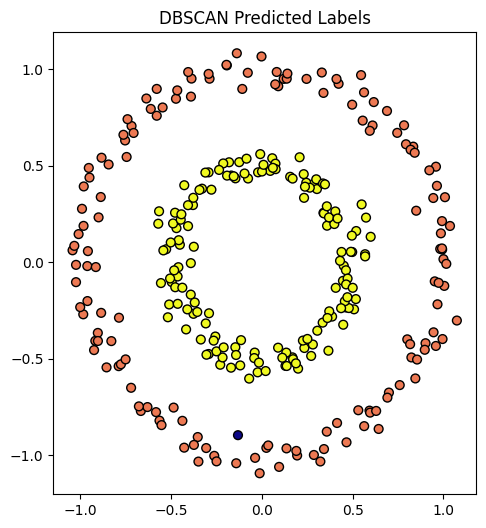

In [21]:
#Dataset 4 
n_samples = 300
random_state = 99

# Dataset4: noisy circles dataset
X,y4 = datasets.make_circles(n_samples=n_samples, factor=.5, noise=.05, random_state=random_state)


# Initialize and fit the DBSCAN model
eps = 0.14
min_points = 4
dbscan_model = DBSCAN(eps=eps, minpoint=min_points)
dbscan_model.fit(X)

# Get the predicted labels from DBSCAN
predicted_labels4 = dbscan_model.labels

# Visualize the results
plt.figure(figsize=(12, 6))

# Plot DBSCAN predicted labels
plt.subplot(1, 2, 2)
plt.scatter(X[:, 0], X[:, 1], c=predicted_labels4, cmap='plasma', edgecolors='k', s=40)
plt.title("DBSCAN Predicted Labels")

plt.show()

# **evaluation metrics for Dataset 4**

In [22]:
# Calculate evaluation metrics
f1_DB4 = metrics.f1_score(y4, predicted_labels4, average='weighted')
nmi_DB4 = metrics.normalized_mutual_info_score(y4, predicted_labels4)
rand_index_DB4 = metrics.rand_score(y4, predicted_labels4)  

# Create a styled table
results_styled = (
    pd.DataFrame({
        'Metric': ['F-measure', 'NMI', 'Rand Index'],
        'Score': [f1_DB4, nmi_DB4, rand_index_DB4]
    })
    .sort_values(by='Score', ascending=False)
    .set_index('Metric')
    .assign(Score=lambda x: x['Score'].apply(lambda y: f'{y:.4f}')) 
    .style.set_caption('Evaluation Metrics DataSet 4')
    .set_table_styles([
        {'selector': 'table', 'props': [('margin-left', '20px'), ('width', '900px'), 
                                        ('background-color', '#f2f2f2'), ('border', '1px solid #ddd')]}, 
        {'selector': 'thead', 'props': [('display', 'none')]},
        {'selector': 'th.col_heading', 'props': [('display', 'none')]},  
        {'selector': 'td', 'props': [('font-size', '14px'), ('text-align', 'left'), 
                                      ('font-family', 'Arial, sans-serif'), ('padding', '13px')]}  
    ])
)

# Display the table
results_styled

,Score
Metric,
Rand Index,0.9967
NMI,0.9858
F-measure,0.0000


# **K-MEAN VS DBSCAN**

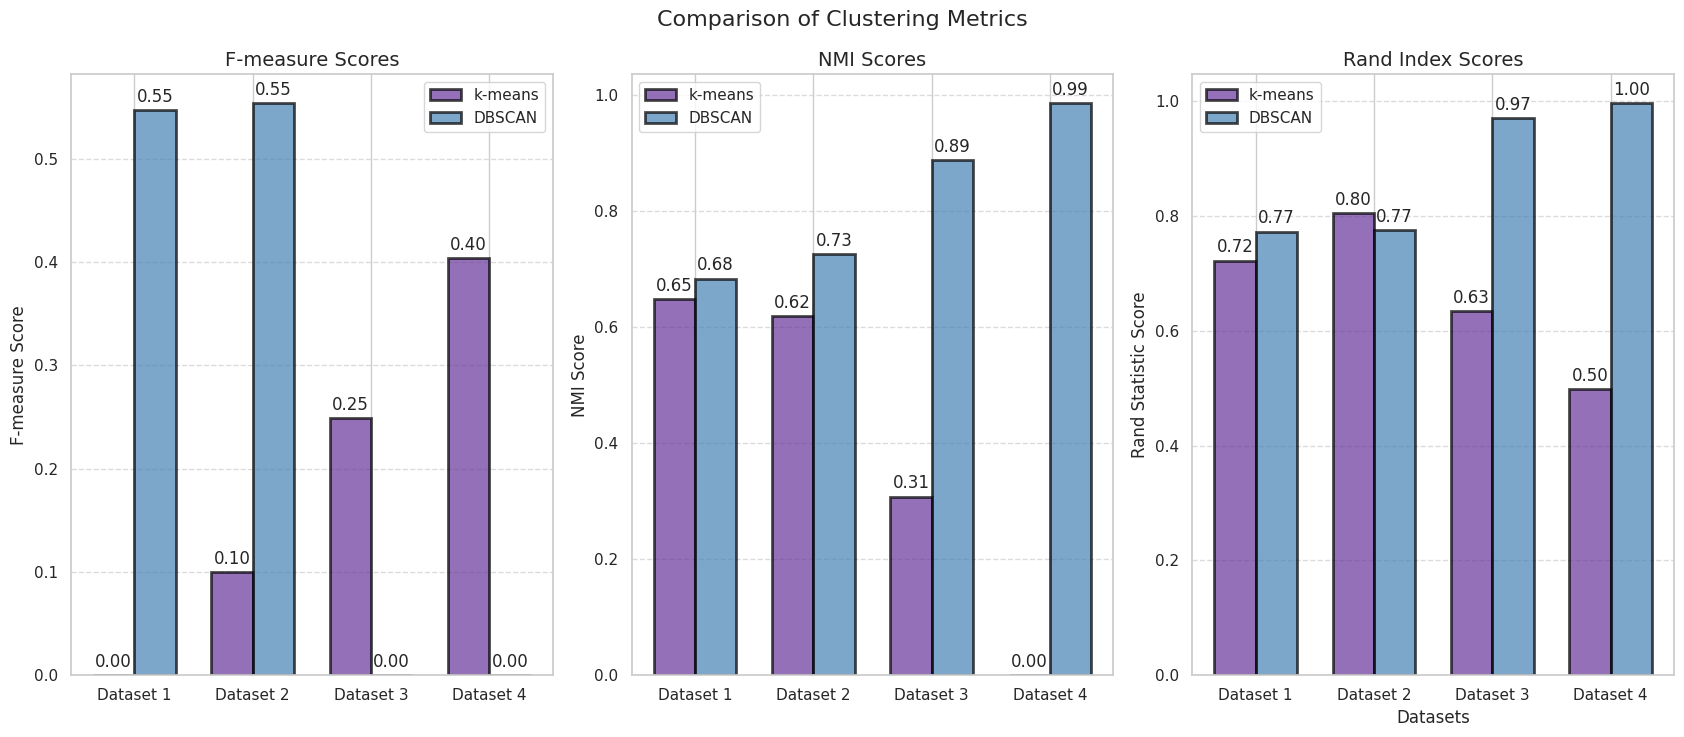

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

# Use Seaborn style
sns.set(style="whitegrid")

# Create a figure and a single subplot with three columns
fig, axs = plt.subplots(1, 3, figsize=(17, 7.5))

# Define positions for each dataset
positions = np.arange(1, 5)
width = 0.35  # Width of the bars

# Function to add value annotations above the bars
def add_value_annotations(ax, bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}', xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3), textcoords='offset points',
                    ha='center', va='bottom')

# Plot F-measure scores for k-means and DBSCAN with consistent colors
bars_kmeans = axs[0].bar(positions - width/2, [f_measure_1k, f_measure_2k, f_measure_3k, f_measure_k4], width, label='k-means', color='rebeccapurple', edgecolor='black', linewidth=2, alpha=0.7)
bars_DBSAN= axs[0].bar(positions + width/2, [f1_DB1 ,f1_DB2 ,f1_DB3 ,f1_DB4], width, label='DBSCAN', color='steelblue', edgecolor='black', linewidth=2, alpha=0.7)
axs[0].set_ylabel('F-measure Score', fontsize=12)
axs[0].set_title('F-measure Scores', fontsize=14)
axs[0].set_xticks(positions)
axs[0].set_xticklabels(['Dataset 1', 'Dataset 2', 'Dataset 3', 'Dataset 4'])
axs[0].legend()

# Add value annotations for F-measure
add_value_annotations(axs[0], bars_kmeans)
add_value_annotations(axs[0], bars_DBSAN)

# Plot NMI scores for k-means and DBSCAN with consistent colors
bars_kmeans_nmi = axs[1].bar(positions - width/2, [nmi_1k, nmi_2k, nmi_3k, nmi_k4], width, label='k-means', color='rebeccapurple', edgecolor='black', linewidth=2, alpha=0.7)
bars_DBSAN_nmi = axs[1].bar(positions + width/2, [nmi_DB1 ,nmi_DB2 ,nmi_DB3 ,nmi_DB4], width, label='DBSCAN', color='steelblue', edgecolor='black', linewidth=2, alpha=0.7)
axs[1].set_ylabel('NMI Score', fontsize=12)
axs[1].set_title('NMI Scores', fontsize=14)
axs[1].set_xticks(positions)
axs[1].set_xticklabels(['Dataset 1', 'Dataset 2', 'Dataset 3', 'Dataset 4'])
axs[1].legend()

# Add value annotations for NMI
add_value_annotations(axs[1], bars_kmeans_nmi)
add_value_annotations(axs[1], bars_DBSAN_nmi)

# Plot Rand scores for k-means and DBSAN with consistent colors
bars_kmeans_rand = axs[2].bar(positions - width/2, [rand_1k, rand_2k, rand_3k, rand_k4], width, label='k-means', color='rebeccapurple', edgecolor='black', linewidth=2, alpha=0.7)
bars_DBSCAN_rand = axs[2].bar(positions + width/2, [rand_index_DB1,rand_index_DB2 ,rand_index_DB3 ,rand_index_DB4], width, label='DBSCAN', color='steelblue', edgecolor='black', linewidth=2, alpha=0.7)
axs[2].set_xlabel('Datasets', fontsize=12)
axs[2].set_ylabel('Rand Statistic Score', fontsize=12)
axs[2].set_title('Rand Index Scores', fontsize=14)
axs[2].set_xticks(positions)
axs[2].set_xticklabels(['Dataset 1', 'Dataset 2', 'Dataset 3', 'Dataset 4'])
axs[2].legend()

# Add value annotations for Rand Index
add_value_annotations(axs[2], bars_kmeans_rand)
add_value_annotations(axs[2], bars_DBSCAN_rand)

# Add gridlines for better readability
for ax in axs:
    ax.grid(axis='y', linestyle='--', alpha=0.7)

# Add a title to the entire figure
fig.suptitle('Comparison of Clustering Metrics', fontsize=16)

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()